In [4]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Project based on:

Reference: 
Géron, A. (2022, November 15). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O’Reilly Media.

In [5]:
#Dataset
MNIST = fetch_openml('mnist_784', version = 1)

In [6]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = MNIST["data"], MNIST["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y.shape

(70000,)

In [11]:
some_digit = X.iloc[[0]]

In [12]:
X_np = X.to_numpy()
type(X_np)

numpy.ndarray

In [13]:
some_digit = X_np[0].reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

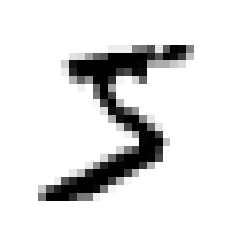

In [14]:
plt.imshow(some_digit, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")

In [15]:
y[0]

'5'

In [16]:
#Function to show image for the given index.
def show_image(idx):
    digit = X_np[idx].reshape(28,28)
    
    plt.imshow(digit, cmap = mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")
    print("label: " + y[idx])

label: 4


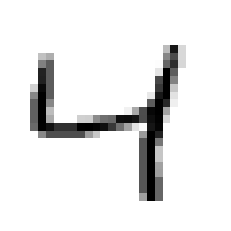

In [17]:
show_image(2)

In [18]:
y = y.astype(np.uint8)
type(y[0])

numpy.uint8

In [19]:
#Dividing date, Train and test data.
X_train, X_test, y_train, y_test = X_np[:60000], X_np[60000:], y[:60000], y[60000:]

In [20]:
X_train.shape

(60000, 784)

In [21]:
#Change the y_label to boolean. True if the label was 4, False if the label was not 4.
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [22]:
y_train_4

0        False
1        False
2         True
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [23]:
#Training model SGDClassifier, binary classifier.
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [24]:
#Prediction
sgd_clf.predict([X_train[2]])

array([ True])

In [25]:
#Cross Validation
cross_val_score(sgd_clf, X_train, y_train_4, cv = 5, scoring = "accuracy")

array([0.97825   , 0.97225   , 0.96308333, 0.9725    , 0.97241667])

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 5)

In [27]:
#Building Confusion Matrix (needs predictions)
confusion_matrix(y_train_4, y_train_pred)

array([[53283,   875],
       [  823,  5019]])

In [28]:
#Precision, how many correct classifications as 4 (true positive)
precision_score(y_train_4, y_train_pred)

0.8515439429928741

In [29]:
#Recall, how many correct classifications as not 4 (true negative)
recall_score(y_train_4, y_train_pred)

0.8591235878123931

In [30]:
#Changing threshold for more precision (at the cost of less recall)
sgd_score_threshold = sgd_clf.decision_function(X_train)
sgd_score_threshold

array([-20719.95525531, -18876.05161184,   3214.66574913, ...,
        -9792.96985385,  -9843.09671316, -13433.78020463])

In [31]:
threshold = 4000
sgd_score_threshold_pred = (sgd_score_threshold > threshold)
precision_score(y_train_4, sgd_score_threshold_pred)

0.9792602095360273

In [32]:
recall_score(y_train_4, sgd_score_threshold_pred)

0.7839780896953098

In [33]:
#ROC score for binary classifiers, SGDClassifier.
roc_auc_score(y_train_4, y_train_pred)

0.9214835783147789

In [34]:
#Random Forest, for binary classification. 
forest_clf = RandomForestClassifier(random_state = 42)

In [35]:
#Cross Validation Prediction
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv = 3, method = "predict_proba")

In [36]:
y_score_forest = y_probas_forest[:,1]

In [37]:
#ROC score for random forest
roc_auc_score(y_train_4, y_score_forest)

0.9982278527638186

In [38]:
rf_pred = cross_val_predict(forest_clf, X_train, y_train_4, cv = 3)

In [39]:
#Precision score for random forest
precision_score(y_train_4, rf_pred)

0.992267543011792

In [40]:
#Recall score for random forest
recall_score(y_train_4, rf_pred)

0.8786374529270797

In [41]:
#KNN Classifier, multiple classifier. 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
#Cross validation score
cross_val_score(knn_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [43]:
#Cross validation for k in range(5,10) 
for i in range(5,10):
    knn_clf_i = KNeighborsClassifier(n_neighbors=i)
    print(cross_val_score(knn_clf_i, X_train, y_train, cv = 3, scoring = "accuracy"))

KeyboardInterrupt: 

In [134]:
#f1 score for KNN Classifier.
pred_ej = knn_clf.predict(X_train)
f1_score(y_train, pred_ej, average = "macro")

0.9818602932050764

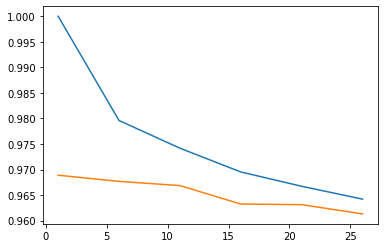

In [138]:
#Graph f1 score for different K values
i_neightbor_plot = list(range(1,30,5))
train_r = []
test_r = []
for i in range(1,30,5):
    
    #Train Data
    knn_clf_i = KNeighborsClassifier(n_neighbors = i)
    knn_clf_i.fit(X_train, y_train)
    train_pred = knn_clf_i.predict(X_train)
    f1_score_i = f1_score(y_train, train_pred, average = "macro")
    train_r.append(f1_score_i)
    
    #Test Data
    test_pred = knn_clf_i.predict(X_test)
    f1_score_i = f1_score(y_test, test_pred, average = "macro")
    test_r.append(f1_score_i)
    
train_line = plt.plot(i_neightbor_plot, train_r, label="Train AUC")
test_line = plt.plot(i_neightbor_plot, test_r, label="Test AUC")
    
plt.show()

In [49]:
#Best precision score for k values from 1 to 3.
for i in range(1,4):
    knn_clf_i = KNeighborsClassifier(n_neighbors = i)
    knn_clf_i.fit(X_train, y_train)
    test_pred_f = knn_clf_i.predict(X_test)
    print(precision_score(y_test, test_pred_f, average = "macro"))

0.9691476332561566
0.9635275666515613
0.9709116052270813


In [53]:
#The best model we found was with n_neighbors = 3
knn_clf_model = KNeighborsClassifier(n_neighbors = 3)
knn_clf_model.fit(X_train, y_train)
test_pred_final_model = knn_clf_model.predict(X_test)
p_score = precision_score(y_test, test_pred_f, average = "macro")
r_score = recall_score(y_test, test_pred_f, average = "macro")

In [54]:
#Precision score and recall score
print(p_score, r_score)

0.9709116052270813 0.9701144344783679


In [55]:
#Confusion matrix 
conf_matrix = confusion_matrix(y_test, test_pred_final)
conf_matrix

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]])

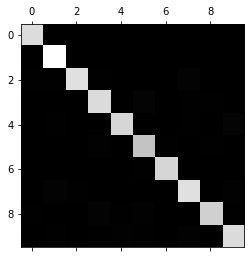

In [56]:
#Using colors for the confusion matrix
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In conclusion the SGDClassifier had a good result but the random forest had a clearly better accuracy for the binary classification. On the other hand the we manage to get more than 97% accuracy with the KNN Classifier. 